In [0]:
import scipy.stats as sts
import matplotlib.pyplot as plt
import numpy as np
import math

###Функции

In [0]:
def sred(viborka):
  x = np.array(list(map(float,viborka)))
  sred = round(x.sum()/len(x), 2)
  return sred

In [0]:
def vibdisp(viborka):
  x = np.array(list(map(float,viborka)))
  sred = round(x.sum()/len(x), 2)
  vibdisp =((x - np.array([sred]* len(x)))**2).sum()/(len(x)-1)
  return vibdisp

In [0]:
def hypnormvib(sred,mu,vibdisp,n,alpha,h1):
  if h1 == '=': # альтернативная гипотеза задается как неравенство
    ras = (sred - mu)/(vibdisp/n)**0.5
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(sts.t.ppf(0.001, df=n-1),sts.t.ppf(0.999, df=n-1), 100)
    ax.plot(x, sts.t.pdf(x, df=n-1),'g-')
    ax.plot([ras,ras], [0,sts.t.pdf(ras, df=n-1)], 'b-')
    ax.plot([sts.t.ppf(alpha/2, df=n-1),sts.t.ppf(alpha/2, df=n-1)], [0,sts.t.pdf(sts.t.ppf(alpha/2, df=n-1), df=n-1)], 'r-')
    ax.plot([sts.t.ppf(1-alpha/2, df=n-1),sts.t.ppf(1-alpha/2, df=n-1)], [0,sts.t.pdf(sts.t.ppf(1-alpha/2, df=n-1), df=n-1)], 'r-')
    ax.plot([min(x),max(x)], [0,0])
    plt.show()
    print('расчетное значение:' + str(round(ras,3)))
    right = sts.t.ppf(1-alpha/2, df = n-1)
    left = sts.t.ppf(alpha/2, df = n-1)
    print(f'Область неотвержения H0:({round(left,3)}, {round(right,3)})')
    print('p-value:'+ str(min(round(2*sts.t.cdf(-ras, df=n-1),3), round(2*sts.t.cdf(ras, df=n-1),3))))
    if ras < right and ras > left:
      return 'H0 не отвергается'
    else:
      return 'H0 отвергается'
  elif h1 == '>':
      ras = (sred - mu)/(vibdisp/n)**0.5
      fig, ax = plt.subplots(1, 1)
      x = np.linspace(sts.t.ppf(0.001, df=n-1),sts.t.ppf(0.999, df=n-1), 100)
      ax.plot(x, sts.t.pdf(x, df=n-1),'g-')
      ax.plot([ras,ras], [0,sts.t.pdf(ras, df=n-1)], 'b-')
      ax.plot([sts.t.ppf(1-alpha, df=n-1),sts.t.ppf(1-alpha, df=n-1)], [0,sts.t.pdf(sts.t.ppf(1-alpha, df=n-1), df=n-1)], 'r-')
      ax.plot([min(x),max(x)], [0,0])
      plt.show()
      print('расчетное значение:' + str(round(ras,3)))
      right = sts.t.ppf(1-alpha, df = n-1)
      print(f'Область неотвержения H0:(-inf ,{round(right,3)})')
      print('p-value:'+ str(round(1-sts.t.cdf(ras, df=n-1),3)))
      if ras < right:
        return 'H0 не отвергается'
      else:
        return 'H0 отвергается'
  elif h1 == '<':
      ras = (sred - mu)/(vibdisp/n)**0.5
      fig, ax = plt.subplots(1, 1)
      x = np.linspace(sts.t.ppf(0.001, df=n-1),sts.t.ppf(0.999, df=n-1), 100)
      ax.plot(x, sts.t.pdf(x, df=n-1),'g-')
      ax.plot([ras,ras], [0,sts.t.pdf(ras, df=n-1)], 'b-')
      ax.plot([sts.t.ppf(alpha, df=n-1),sts.t.ppf(alpha, df=n-1)], [0,sts.t.pdf(sts.t.ppf(alpha, df=n-1), df=n-1)], 'r-')
      ax.plot([min(x),max(x)], [0,0])
      plt.show()
      print('расчетное значение:' + str(round(ras,3)))
      left = sts.t.ppf(alpha, df = n-1)
      print(f'Область неотвержения H0:({round(left,3)}, inf)')
      print('p-value:'+ str(round(sts.t.cdf(ras, df=n-1),3)))
      if ras > left:
        return 'H0 не отвергается'
      else:
        return 'H0 отвергается'

In [0]:
def hypnorm(sred,mu,disp,n,alpha,h1):
  if h1 == '=':
    ras = (sred - mu)/(disp/n)**0.5
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(sts.norm.ppf(0.00001), sts.norm.ppf(0.99999), 100)
    ax.plot(x, sts.norm.pdf(x), 'g-')
    ax.plot([ras,ras], [0,sts.norm.pdf(ras)], 'b-')
    ax.plot([sts.norm.ppf(alpha/2),sts.norm.ppf(alpha/2)], [0,sts.norm.pdf(sts.norm.ppf(alpha/2))], 'r-')
    ax.plot([sts.norm.ppf(1-alpha/2),sts.norm.ppf(1-alpha/2)], [0,sts.norm.pdf(sts.norm.ppf(1-alpha/2))], 'r-')
    ax.plot([min(x),max(x)], [0,0], 'g-')
    plt.show()
    print('расчетное значение:' + str(round(ras,3)))
    right = sts.norm.ppf(1-alpha/2)
    left = sts.norm.ppf(alpha/2)
    print(f'Область неотвержения H0:({round(left,3)}, {round(right,3)})')
    print('p-value:'+ str(min(round(2*sts.norm.cdf(-ras),3), round(2*sts.norm.cdf(ras),3))))
    if ras < right and ras > left:
      return 'H0 не отвергается'
    else:
      return 'H0 отвергается'
  elif h1 == '>':
      ras = (sred - mu)/(disp/n)**0.5
      fig, ax = plt.subplots(1, 1)
      x = np.linspace(sts.norm.ppf(0.00001), sts.norm.ppf(0.99999), 100)
      ax.plot(x, sts.norm.pdf(x), 'g-')
      ax.plot([ras,ras], [0,sts.norm.pdf(ras)], 'b-')
      ax.plot([sts.norm.ppf(1-alpha),sts.norm.ppf(1-alpha)], [0,sts.norm.pdf(sts.norm.ppf(1-alpha))], 'r-')
      ax.plot([min(x),max(x)], [0,0], 'g-')
      plt.show()
      print('расчетное значение:' + str(round(ras,3)))
      right = sts.norm.ppf(1-alpha)
      print(f'Область неотвержения H0:(-inf ,{round(right,3)})')
      print('p-value:'+ str(round(1-sts.norm.cdf(ras),3)))
      if ras < right:
        return 'H0 не отвергается'
      else:
        return 'H0 отвергается'
  elif h1 == '<':
      ras = (sred - mu)/(disp/n)**0.5
      fig, ax = plt.subplots(1, 1)
      x = np.linspace(sts.norm.ppf(0.00001), sts.norm.ppf(0.99999), 100)
      ax.plot(x, sts.norm.pdf(x), 'g-')
      ax.plot([ras,ras], [0,sts.norm.pdf(ras)], 'b-')
      ax.plot([sts.norm.ppf(alpha),sts.norm.ppf(alpha)], [0,sts.norm.pdf(sts.norm.ppf(alpha))], 'r-')
      ax.plot([min(x),max(x)], [0,0], 'g-')
      plt.show()
      print('расчетное значение:' + str(round(ras,3)))
      left = sts.norm.ppf(alpha)
      print(f'Область неотвержения H0:({round(left,3)}, inf)')
      print('p-value:'+ str(round(sts.norm.cdf(ras),3)))
      if ras > left:
        return 'H0 не отвергается'
      else:
        return 'H0 отвергается'

In [0]:
def hypdisp(disp, vibdisp, n, alpha, h1):
  if h1 == '=':
    ras = vibdisp*(n-1)/disp
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(sts.chi2.ppf(0.00000001, df=n-1),sts.chi2.ppf(0.999999999, df=n-1), 100)
    ax.plot(x, sts.chi2.pdf(x, df=n-1),'g-')
    ax.plot([ras,ras], [0,sts.chi2.pdf(ras, df=n-1)], 'b-')
    ax.plot([sts.chi2.ppf(alpha/2, df=n-1),sts.chi2.ppf(alpha/2, df=n-1)], [0,sts.chi2.pdf(sts.chi2.ppf(alpha/2, df=n-1), df=n-1)], 'r-')
    ax.plot([sts.chi2.ppf(1-alpha/2, df=n-1),sts.chi2.ppf(1-alpha/2, df=n-1)], [0,sts.chi2.pdf(sts.chi2.ppf(1-alpha/2, df=n-1), df=n-1)], 'r-')
    ax.plot([min(x),max(x)], [0,0])
    plt.show()
    print('расчетное значение:' + str(round(ras,3)))
    right = sts.chi2.ppf(1-alpha/2, df = n-1)
    left = sts.chi2.ppf(alpha/2, df = n-1)
    print(f'Область неотвержения H0:({round(left,3)}, {round(right,3)})')
    if sts.chi2.cdf(ras, df=n-1) < 0.5:
      print('p-value:'+ str(round(2*sts.chi2.cdf(ras, df=n-1),3)))
    else:
      print('p-value:'+ str(round(2*(1-sts.chi2.cdf(ras, df=n-1)),3)))
    if ras < right and ras > left:
        return 'H0 не отвергается'
    else:
        return 'H0 отвергается'
  if h1 == '>':
      ras = (vibdisp*(n-1))/disp
      fig, ax = plt.subplots(1, 1)
      x = np.linspace(sts.chi2.ppf(0.00000001, df=n-1),sts.chi2.ppf(0.999999999, df=n-1), 100)
      ax.plot(x, sts.chi2.pdf(x, df=n-1),'g-')
      ax.plot([ras,ras], [0,sts.chi2.pdf(ras, df=n-1)], 'b-')
      ax.plot([sts.chi2.ppf(1-alpha, df=n-1),sts.chi2.ppf(1-alpha, df=n-1)], [0,sts.chi2.pdf(sts.chi2.ppf(1-alpha, df=n-1), df=n-1)], 'r-')
      ax.plot([min(x),max(x)], [0,0])
      plt.show()
      print('расчетное значение:' + str(round(ras,3)))
      right = sts.chi2.ppf(1-alpha, df = n-1)
      print(f'Область неотвержения H0:(0, {round(right,3)})')
      print('p-value:'+ str(round((1-sts.chi2.cdf(ras, df=n-1)),3)))
      if ras < right:
        return 'H0 не отвергается'
      else:
        return 'H0 отвергается'
  if h1 == '<':
    ras = (vibdisp*(n-1))/disp
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(sts.chi2.ppf(0.00000001, df=n-1),sts.chi2.ppf(0.999999999, df=n-1), 100)
    ax.plot(x, sts.chi2.pdf(x, df=n-1),'g-')
    ax.plot([ras,ras], [0,sts.chi2.pdf(ras, df=n-1)], 'b-')
    ax.plot([sts.chi2.ppf(alpha, df=n-1),sts.chi2.ppf(alpha, df=n-1)], [0,sts.chi2.pdf(sts.chi2.ppf(alpha, df=n-1), df=n-1)], 'r-')
    ax.plot([min(x),max(x)], [0,0])
    plt.show()
    print('расчетное значение:' + str(round(ras,3)))
    left = sts.chi2.ppf(alpha, df = n-1)
    print(f'Область неотвержения H0:({round(left,3)}, inf)')
    print('p-value:'+ str(round((sts.chi2.cdf(ras, df=n-1)),3)))
    if ras > left:
        return 'H0 не отвергается'
    else:
        return 'H0 отвергается'

In [0]:
def hypravndisp(disp1,disp2, n1, n2, alpha,h1):
  if h1 == '=':
    ras = disp1/disp2
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(sts.f.ppf(0.00000001, n1-1, n2-1),sts.f.ppf(0.999, n1-1, n2-1), 100)
    ax.plot(x, sts.f.pdf(x, n1-1, n2-1),'g-')
    ax.plot([ras,ras], [0,sts.f.pdf(ras, n1-1, n2-1)], 'b-')
    ax.plot([sts.f.ppf(alpha/2, n1-1, n2-1),sts.f.ppf(alpha/2, n1-1, n2-1)], [0,sts.f.pdf(sts.f.ppf(alpha/2, n1-1, n2-1), n1-1, n2-1)], 'r-')
    ax.plot([sts.f.ppf(1-alpha/2, n1-1, n2-1),sts.f.ppf(1-alpha/2, n1-1, n2-1)], [0,sts.f.pdf(sts.f.ppf(1-alpha/2, n1-1, n2-1), n1-1, n2-1)], 'r-')
    ax.plot([min(x),max(x)], [0,0])
    plt.show()
    print('расчетное значение:' + str(round(ras,3)))
    right = sts.f.ppf(1-alpha/2, n1-1, n2-1)
    left = sts.f.ppf(alpha/2,n1-1, n2-1)
    print(f'Область неотвержения H0:({round(left,3)}, {round(right,3)})')
    if sts.f.cdf(ras, n1-1, n2-1) < 0.5:
      print('p-value:'+ str(round(2*sts.f.cdf(ras, n1-1, n2-1),3)))
    else:
      print('p-value:'+ str(round(2*(1-sts.f.cdf(ras, n1-1, n2-1)),3)))
    if ras > left and ras < right:
      return 'H0 не отвергается'
    else:
      return 'H0 отвергается'
  elif h1 =='>':
    ras = disp1/disp2
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(sts.f.ppf(0.00000001, n1-1, n2-1),sts.f.ppf(0.999, n1-1, n2-1), 100)
    ax.plot(x, sts.f.pdf(x, n1-1, n2-1),'g-')
    ax.plot([ras,ras], [0,sts.f.pdf(ras, n1-1, n2-1)], 'b-')
    ax.plot([sts.f.ppf(1-alpha, n1-1, n2-1),sts.f.ppf(1-alpha, n1-1, n2-1)], [0,sts.f.pdf(sts.f.ppf(1-alpha, n1-1, n2-1), n1-1, n2-1)], 'r-')
    ax.plot([min(x),max(x)], [0,0])
    plt.show()
    print('расчетное значение:' + str(round(ras,3)))
    right = sts.f.ppf(1-alpha, n1-1, n2-1)
    print(f'Область неотвержения H0:(0, {round(right,3)})')
    print('p-value:'+ str(round(1-sts.f.cdf(ras, n1-1, n2-1),3)))
    if ras < right:
      return 'H0 не отвергается'
    else:
      return 'H0 отвергается'
  elif h1 == '<':
    ras = disp1/disp2
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(sts.f.ppf(0.00000001, n1-1, n2-1),sts.f.ppf(0.999, n1-1, n2-1), 100)
    ax.plot(x, sts.f.pdf(x, n1-1, n2-1),'g-')
    ax.plot([ras,ras], [0,sts.f.pdf(ras, n1-1, n2-1)], 'b-')
    ax.plot([sts.f.ppf(alpha, n1-1, n2-1),sts.f.ppf(alpha, n1-1, n2-1)], [0,sts.f.pdf(sts.f.ppf(alpha, n1-1, n2-1), n1-1, n2-1)], 'r-')
    ax.plot([min(x),max(x)], [0,0], 'g-')
    plt.show()
    print('расчетное значение:' + str(round(ras,3)))
    left = sts.f.ppf(alpha,n1-1, n2-1)
    print(f'Область неотвержения H0:({round(left,3)}, inf)')
    print('p-value:'+ str(round(sts.f.cdf(ras, n1-1, n2-1),3)))
    if ras > left:
      return 'H0 не отвергается'
    else:
      return 'H0 отвергается'


    

In [0]:
def hypraznmu_ravndisp(sredx,sredy,vibdispx,vibdispy,mux_muy,nx,ny,alpha, h1):
  n = nx +ny -1
  if h1 == '=':
    ras = ((sredx - sredy) - (mux_muy))/((((nx-1)*vibdispx + (ny-1)*vibdispy)/(nx + ny -2))*(1/nx +1/ny))**0.5
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(sts.t.ppf(0.001, df=n-1),sts.t.ppf(0.999, df=n-1), 100)
    ax.plot(x, sts.t.pdf(x, df=n-1),'g-')
    ax.plot([ras,ras], [0,sts.t.pdf(ras, df=n-1)], 'b-')
    ax.plot([sts.t.ppf(alpha/2, df=n-1),sts.t.ppf(alpha/2, df=n-1)], [0,sts.t.pdf(sts.t.ppf(alpha/2, df=n-1), df=n-1)], 'r-')
    ax.plot([sts.t.ppf(1-alpha/2, df=n-1),sts.t.ppf(1-alpha/2, df=n-1)], [0,sts.t.pdf(sts.t.ppf(1-alpha/2, df=n-1), df=n-1)], 'r-')
    ax.plot([min(x),max(x)], [0,0])
    plt.show()
    print('расчетное значение:' + str(round(ras,3)))
    right = sts.t.ppf(1-alpha/2, df = n-1)
    left = sts.t.ppf(alpha/2, df = n-1)
    print(f'Область неотвержения H0:({round(left,3)}, {round(right,3)})')
    print('p-value:'+ str(min(round(2*sts.t.cdf(-ras, df=n-1),3), round(2*sts.t.cdf(ras, df=n-1),3))))
    if ras < right and ras > left:
      return 'H0 не отвергается'
    else:
      return 'H0 отвергается'
  elif h1 == '>':
      ras = ((sredx - sredy) - (mux_muy))/((((nx-1)*vibdispx + (ny-1)*vibdispy)/(nx + ny -2))*(1/nx +1/ny))**0.5
      fig, ax = plt.subplots(1, 1)
      x = np.linspace(sts.t.ppf(0.001, df=n-1),sts.t.ppf(0.999, df=n-1), 100)
      ax.plot(x, sts.t.pdf(x, df=n-1),'g-')
      ax.plot([ras,ras], [0,sts.t.pdf(ras, df=n-1)], 'b-')
      ax.plot([sts.t.ppf(1-alpha, df=n-1),sts.t.ppf(1-alpha, df=n-1)], [0,sts.t.pdf(sts.t.ppf(1-alpha, df=n-1), df=n-1)], 'r-')
      ax.plot([min(x),max(x)], [0,0])
      plt.show()
      print('расчетное значение:' + str(round(ras,3)))
      right = sts.t.ppf(1-alpha, df = n-1)
      print(f'Область неотвержения H0:(-inf, {round(right,3)})')
      print('p-value:'+ str(round(1-sts.t.cdf(ras, df=n-1),3)))
      if ras < right:
        return 'H0 не отвергается'
      else:
        return 'H0 отвергается'
  elif h1 == '<':
      ras = ((sredx - sredy) - (mux_muy))/((((nx-1)*vibdispx + (ny-1)*vibdispy)/(nx + ny -2))*(1/nx +1/ny))**0.5
      fig, ax = plt.subplots(1, 1)
      x = np.linspace(sts.t.ppf(0.001, df=n-1),sts.t.ppf(0.999, df=n-1), 100)
      ax.plot(x, sts.t.pdf(x, df=n-1),'g-')
      ax.plot([ras,ras], [0,sts.t.pdf(ras, df=n-1)], 'b-')
      ax.plot([sts.t.ppf(alpha, df=n-1),sts.t.ppf(alpha, df=n-1)], [0,sts.t.pdf(sts.t.ppf(alpha, df=n-1), df=n-1)], 'r-')
      ax.plot([min(x),max(x)], [0,0])
      plt.show()
      print('расчетное значение:' + str(round(ras,3)))
      left = sts.t.ppf(alpha, df = n-1)
      print(f'Область неотвержения H0:({round(left,3)}, inf)')
      print('p-value:'+ str(round(sts.t.cdf(ras, df=n-1),3)))
      if ras > left:
        return 'H0 не отвергается'
      else:
        return 'H0 отвергается'

In [0]:
def hypraznmu_izvdisp(sredx,sredy,dispx,dispy,mux_muy,nx,ny,alpha, h1):
  if h1 == '=':
    ras = ((sredx-sredy) - (mux_muy))/(dispx/nx + dispy/ny)**0.5
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(sts.norm.ppf(0.00001), sts.norm.ppf(0.99999), 100)
    ax.plot(x, sts.norm.pdf(x), 'g-')
    ax.plot([ras,ras], [0,sts.norm.pdf(ras)], 'b-')
    ax.plot([sts.norm.ppf(alpha/2),sts.norm.ppf(alpha/2)], [0,sts.norm.pdf(sts.norm.ppf(alpha/2))], 'r-')
    ax.plot([sts.norm.ppf(1-alpha/2),sts.norm.ppf(1-alpha/2)], [0,sts.norm.pdf(sts.norm.ppf(1-alpha/2))], 'r-')
    ax.plot([min(x),max(x)], [0,0], 'g-')
    plt.show()
    print('расчетное значение:' + str(round(ras,3)))
    right = sts.norm.ppf(1-alpha/2)
    left = sts.norm.ppf(alpha/2)
    print(f'Область неотвержения H0:({round(left,3)}, {round(right,3)})')
    print('p-value:'+ str(min(round(2*sts.norm.cdf(-ras),3), round(2*sts.norm.cdf(ras),3))))
    if ras < right and ras > left:
      return 'H0 не отвергается'
    else:
      return 'H0 отвергается'
  elif h1 == '>':
      ras = ((sredx-sredy) - (mux_muy))/(dispx/nx + dispy/ny)**0.5
      fig, ax = plt.subplots(1, 1)
      x = np.linspace(sts.norm.ppf(0.00001), sts.norm.ppf(0.99999), 100)
      ax.plot(x, sts.norm.pdf(x), 'g-')
      ax.plot([ras,ras], [0,sts.norm.pdf(ras)], 'b-')
      ax.plot([sts.norm.ppf(1-alpha),sts.norm.ppf(1-alpha)], [0,sts.norm.pdf(sts.norm.ppf(1-alpha))], 'r-')
      ax.plot([min(x),max(x)], [0,0], 'g-')
      plt.show()
      print('расчетное значение:' + str(round(ras,3)))
      right = sts.norm.ppf(1-alpha)
      print(f'Область неотвержения H0:(-inf, {round(right,3)})')
      print('p-value:'+ str(round(1-sts.norm.cdf(ras),3)))
      if ras < right:
        return 'H0 не отвергается'
      else:
        return 'H0 отвергается'
  elif h1 == '<':
      ras = ((sredx-sredy) - (mux_muy))/(dispx/nx + dispy/ny)**0.5
      fig, ax = plt.subplots(1, 1)
      x = np.linspace(sts.norm.ppf(0.00001), sts.norm.ppf(0.99999), 100)
      ax.plot(x, sts.norm.pdf(x), 'g-')
      ax.plot([ras,ras], [0,sts.norm.pdf(ras)], 'b-')
      ax.plot([sts.norm.ppf(alpha),sts.norm.ppf(alpha)], [0,sts.norm.pdf(sts.norm.ppf(alpha))], 'r-')
      ax.plot([min(x),max(x)], [0,0], 'g-')
      plt.show()
      print('расчетное значение:' + str(round(ras,3)))
      left = sts.norm.ppf(alpha)
      print(f'Область неотвержения H0:({round(left,3)}, inf)')
      print('p-value:'+ str(round(sts.norm.cdf(ras),3)))
      if ras > left:
        return 'H0 не отвергается'
      else:
        return 'H0 отвергается'

In [0]:
def hyprazndol(px,py,px_py,nx,ny,alpha,h1):
  p0 = (nx*px +ny*py)/(nx+ny)
  ras = ((px-py)-px_py)/(p0*(1-p0)*(1/nx +1/ny))**0.5
  if h1 == '=':
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(sts.norm.ppf(0.00001), sts.norm.ppf(0.99999), 100)
    ax.plot(x, sts.norm.pdf(x), 'g-')
    ax.plot([ras,ras], [0,sts.norm.pdf(ras)], 'b-')
    ax.plot([sts.norm.ppf(alpha/2),sts.norm.ppf(alpha/2)], [0,sts.norm.pdf(sts.norm.ppf(alpha/2))], 'r-')
    ax.plot([sts.norm.ppf(1-alpha/2),sts.norm.ppf(1-alpha/2)], [0,sts.norm.pdf(sts.norm.ppf(1-alpha/2))], 'r-')
    ax.plot([min(x),max(x)], [0,0], 'g-')
    plt.show()
    print('расчетное значение:' + str(round(ras,3)))
    right = sts.norm.ppf(1-alpha/2)
    left = sts.norm.ppf(alpha/2)
    print(f'Область неотвержения H0:({round(left,3)}, {round(right,3)})')
    print('p-value:'+ str(min(round(2*sts.norm.cdf(-ras),3), round(2*sts.norm.cdf(ras),3))))
    if ras < right and ras > left:
      return 'H0 не отвергается'
    else:
      return 'H0 отвергается'
  elif h1 == '>':
      fig, ax = plt.subplots(1, 1)
      x = np.linspace(sts.norm.ppf(0.00001), sts.norm.ppf(0.99999), 100)
      ax.plot(x, sts.norm.pdf(x), 'g-')
      ax.plot([ras,ras], [0,sts.norm.pdf(ras)], 'b-')
      ax.plot([sts.norm.ppf(1-alpha),sts.norm.ppf(1-alpha)], [0,sts.norm.pdf(sts.norm.ppf(1-alpha))], 'r-')
      ax.plot([min(x),max(x)], [0,0], 'g-')
      plt.show()
      print('расчетное значение:' + str(round(ras,3)))
      right = sts.norm.ppf(1-alpha)
      print(f'Область неотвержения H0:(-inf, {round(right,3)})')
      print('p-value:'+ str(round(1-sts.norm.cdf(ras),3)))
      if ras < right:
        return 'H0 не отвергается'
      else:
        return 'H0 отвергается'
  elif h1 == '<':
      fig, ax = plt.subplots(1, 1)
      x = np.linspace(sts.norm.ppf(0.00001), sts.norm.ppf(0.99999), 100)
      ax.plot(x, sts.norm.pdf(x), 'g-')
      ax.plot([ras,ras], [0,sts.norm.pdf(ras)], 'b-')
      ax.plot([sts.norm.ppf(alpha),sts.norm.ppf(alpha)], [0,sts.norm.pdf(sts.norm.ppf(alpha))], 'r-')
      ax.plot([min(x),max(x)], [0,0], 'g-')
      plt.show()
      print('расчетное значение:' + str(round(ras,3)))
      left = sts.norm.ppf(alpha)
      print(f'Область неотвержения H0:({round(left,3)}, 0)')
      print('p-value:'+ str(round(sts.norm.cdf(ras),3)))
      if ras > left:
        return 'H0 не отвергается'
      else:
        return 'H0 отвергается'

###Примеры

In [0]:
sred()# выборочное среднее
vibdisp()# выборочная дисперсия
hypdisp()# гипотеза о дисперсии
hypnorm()# гипотеза о мат ожидании, известная дисперсия
hypnormvib()# гипотеза о мат ожидании, выборочная дисперсия
hypravndisp()# гипотеза о равенстве дисперсий двух распределений
hypraznmu_izvdisp() #гипотеза о разности матожиданий известные дисперсии
hypraznmu_ravndisp() #гипотеза о разности матожиданий неизвестные, но равные дисперсии
hyprazndol() #гипотеза о разности долей

In [38]:
sred([7,6,5,7624,3474])

2223.2

In [39]:
vibdisp([2,1,0])

1.0

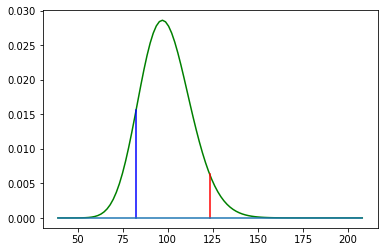

расчетное значение:82.5
Область неотвержения H0:(0, 123.225)
p-value:0.884


'H0 не отвергается'

In [43]:
hypdisp(0.3, 0.25, 100, 0.05, '>')

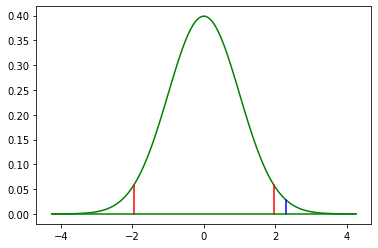

расчетное значение:2.3
Область неотвержения H0:(-1.96, 1.96)
p-value:0.021


'H0 отвергается'

In [49]:
hypnorm(120,100,55**2,40,0.05,'=')

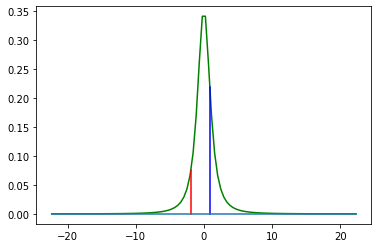

расчетное значение:0.866
Область неотвержения H0:(-1.886, inf)
p-value:0.761


'H0 не отвергается'

In [53]:
hypnormvib(1,0.5,1,3,0.1,'<')

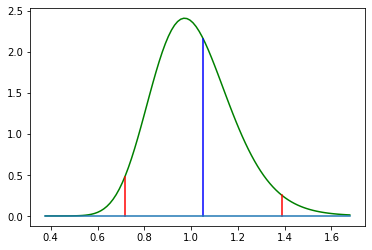

расчетное значение:1.053
Область неотвержения H0:(0.717, 1.388)
p-value:0.757


'H0 не отвергается'

In [70]:
hypravndisp(0.8,0.76,132,156,0.05, '=')

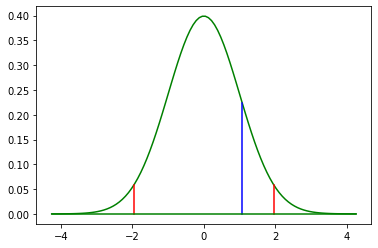

расчетное значение:1.078
Область неотвержения H0:(-1.96, 1.96)
p-value:0.281


'H0 не отвергается'

In [71]:
hypraznmu_izvdisp(6,5,36,25,0,100,50,0.05,'=')

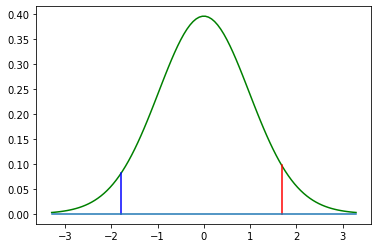

расчетное значение:-1.792
Область неотвержения H0:(-inf, 1.681)
p-value:0.96


'H0 не отвергается'

In [67]:
hypraznmu_ravndisp(9.5,9.8,0.5**2,0.6**2,0,20,25,0.05,'>')

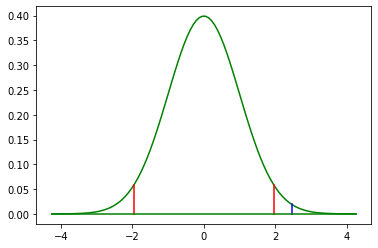

расчетное значение:2.462
Область неотвержения H0:(-1.96, 1.96)
p-value:0.014


'H0 отвергается'

In [74]:
hyprazndol(0.55,0.4,0,100,200,0.05,'=')